From the tutorial: [Julia DifferentialEquations.jl to model an explosion load](https://nikstoyanov.me/post/2019-02-22-single-degree-of-freedom-oscillator/)

See also the [official tutorial of DiffEqTutorials.jl](https://github.com/SciML/DiffEqTutorials.jl)

In [1]:
using Plots
using DiffEqCallbacks
using DifferentialEquations
using ParameterizedFunctions

In [2]:
g = @ode_def begin
    dx = v
    dv = (-c * v - k * x - p) / m
end c k p m

(::var"##253"{var"###ParameterizedDiffEqFunction#276",var"###ParameterizedTGradFunction#277",var"###ParameterizedJacobianFunction#278",Nothing,Nothing,ODESystem}) (generic function with 1 method)

In [3]:
tspan = (0.0, 100.0)
x0 = [0.; 1.0]
p = [0.1, 10.0, 1.0, 1.0];

In [4]:
function condition(x, t, integrator)
    true
end

function affect!(integrator)
    if integrator.t > 60
        integrator.p[3] = 10.
    else
        integrator.p[3] = 1.
    end
end

cb = DiscreteCallback(condition, affect!);

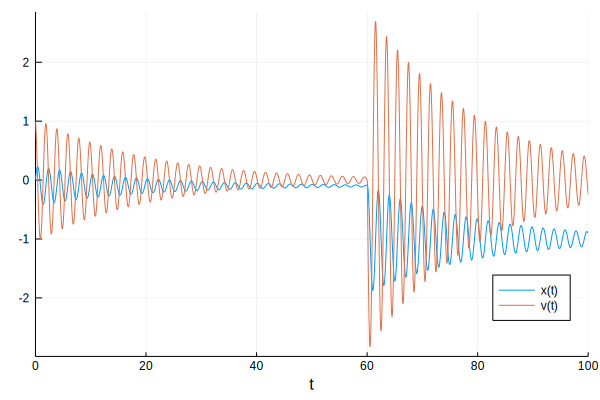

In [5]:
prob = ODEProblem(g, x0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8, callback = cb)
plot(sol, legend=:bottomright, format=:svg)

# Simple Kuramoto

In [6]:
f = @ode_def begin
    dθ1 = w1 - k*sin(θ2 - θ1)
    dθ2 = w2 - k*sin(θ1 - θ2)
end w1 w2 k

(::var"##283"{var"###ParameterizedDiffEqFunction#306",var"###ParameterizedTGradFunction#307",var"###ParameterizedJacobianFunction#308",Nothing,Nothing,ODESystem}) (generic function with 1 method)

In [7]:
tspan = (0.0, 100.0)
θ0 = 2*pi*(randn(1,2))
p = [1.0, 2.0, 1.0]

prob = ODEProblem(f, θ0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8, callback = cb)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 5165-element Array{Float64,1}:
   0.0
   0.014901430001607879
   0.014901430001607879
   0.05211831532228762
   0.05211831532228762
   0.10111872073942138
   0.10111872073942138
   0.1599834663037878
   0.1599834663037878
   0.22984953062827307
   0.22984953062827307
   0.3099677206947904
   0.3099677206947904
   ⋮
 499.27871591356717
 499.27871591356717
 499.4542869566124
 499.4542869566124
 499.6298579926811
 499.6298579926811
 499.8054290217732
 499.8054290217732
 499.98100004388874
 499.98100004388874
 500.0
 500.0
u: 5165-element Array{Array{Float64,2},1}:
 [10.008618403396756 14.729752377298123]
 [10.038421113048159 14.744653957651543]
 [10.038421113048159 14.744653957651543]
 [10.112841334978052 14.78188439168369]
 [10.112841334978052 14.78188439168369]
 [10.210724867264577 14.831002075648566]
 [10.210724867264577 14.831002075648566]
 [10.328014546169037 14.890306633437206]
 [10.328014546169037 14.8903

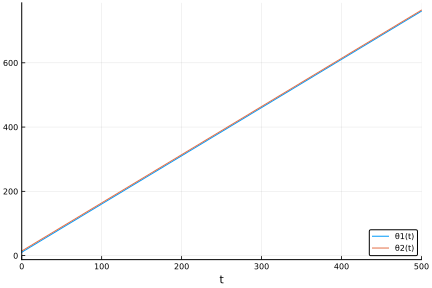

In [8]:
plot(sol, legend=:bottomright, format=:svg)

In [9]:
map.(rem, sol.u, 2*pi)

5165-element Array{Array{Float64,1},1}:
 [3.72543309621717]
 [3.7552358058685726]
 [3.7552358058685726]
 [3.8296560277984657]
 [3.8296560277984657]
 [3.927539560084991]
 [3.927539560084991]
 [4.0448292389894505]
 [4.0448292389894505]
 [4.18336920860712]
 [4.18336920860712]
 [4.340991134500014]
 [4.340991134500014]
 ⋮
 [5.70921364207112]
 [5.70921364207112]
 [5.972570205947079]
 [5.972570205947079]
 [6.235926759358165]
 [6.235926759358165]
 [0.21609799512524575]
 [0.21609799512524575]
 [0.47945452760692575]
 [0.47945452760692575]
 [0.5079550948657143]
 [0.5079550948657143]